In [1]:
#import libraries
import os
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from datasist.structdata import detect_outliers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
pwd

'C:\\Users\\MUH0351\\Predicting-Car-Prices'

In [3]:
path= 'C:\\Users\\Data Files\\Used Cars Prices'

In [4]:
#Reading all CSV files 
audi_df = pd.read_csv(path + '\\audi.csv')
bmw_df = pd.read_csv(path + '\\bmw.csv')
cclass_df = pd.read_csv(path + '\\cclass.csv')
focus_df = pd.read_csv(path + '\\focus.csv')
ford_df = pd.read_csv(path + '\\ford.csv')
hyundi_df = pd.read_csv(path + '\\hyundi.csv')
merc_df = pd.read_csv(path + '\\merc.csv')
skoda_df = pd.read_csv(path + '\\skoda.csv')
toyota_df = pd.read_csv(path + '\\toyota.csv')
vauxhall_df = pd.read_csv(path + '\\vauxhall.csv')
vw_df = pd.read_csv(path + '\\vw.csv')
unclean_cclass_df = pd.read_csv(path + '\\unclean cclass.csv')
unclean_focus_df = pd.read_csv(path + '\\unclean focus.csv')

Let's explore each of the data file

In [5]:
audi_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [6]:
audi_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
bmw_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [8]:
bmw_df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0


In [9]:
cclass_df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [10]:
unclean_cclass_df

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [11]:
focus_df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6


In [12]:
focus_df.tail()

,model,year,price,transmission,mileage,fuelType,engineSize
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0
5453,Focus,2019,17610,Automatic,7886,Petrol,1.0


In [13]:
unclean_focus_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057


In [14]:
unclean_focus_df.tail()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
5599,Focus,2019.0,"£18,745",Manual,NaN,Diesel,2,"7,855",NaN,NaN,/ad/25149519
5600,Focus,2019.0,"£16,350",Manual,NaN,Petrol,1,"13,891",NaN,NaN,/ad/25149523
5601,Focus,2019.0,"£16,850",Manual,NaN,Petrol,1,"13,452",NaN,NaN,/ad/25149532
5602,Focus,2019.0,"£17,310",Automatic,NaN,Petrol,1,"13,376",NaN,NaN,/ad/25149535
5603,Focus,2019.0,"£17,610",Automatic,NaN,Petrol,1,"7,886",NaN,NaN,/ad/25149536


In [15]:
ford_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [16]:
hyundi_df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [17]:
merc_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [18]:
skoda_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


In [19]:
toyota_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [20]:
vauxhall_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4


In [21]:
vw_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


# Data Cleansing:

Following are the notables from the data files:  
* The cclass.csv and focus.csv have missing columns,i.e.tax and mpg.  
* The hyundai_df has 'tax £' column which needs to be renamed as 'tax'.  
* There should be the 'company' column for each of the data file which represents the models' company.  
* Two of the data files i.e. unclean cclass.csv and and unclean focus.csv are unclean data files which needs to be transformed and processed.  

In [22]:
# first add missing columns mpg and tax columns with nan values in focus_df and cclass_df
focus_df['mpg'] = np.nan 
focus_df['tax'] = np.nan
cclass_df['mpg'] = np.nan 
cclass_df['tax'] = np.nan

In [23]:
#rename tax column in hyundai_df
hyundi_df.rename(columns={'tax(£)':'tax'}, inplace=True)

In [24]:
#adding company columnn for each data file
audi_df['company'] = "Audi"
bmw_df ['company'] = "BMW"
cclass_df ['company']='CClass'
unclean_cclass_df['company'] = 'CClass'
focus_df['company'] = 'Focus'
unclean_focus_df['company']='Focus'
ford_df['company']='Ford'
hyundi_df['company'] = 'Hyundi'
merc_df['company']='Mercedez'
skoda_df['company']='Skoda'
toyota_df['company'] = 'Toyota'
vauxhall_df['company'] = 'Vauxhall'
vw_df['company'] = 'Volks Wagon'

In [25]:
#now all the data files except 2 uncleaned files, contains same columns. So, append all the data files into single dataframe.
clean_files = audi_df.append(bmw_df)
clean_files = clean_files.append(cclass_df)
clean_files = clean_files.append(focus_df)
clean_files = clean_files.append(ford_df)
clean_files = clean_files.append(hyundi_df)
clean_files = clean_files.append(merc_df)
clean_files = clean_files.append(skoda_df)
clean_files = clean_files.append(toyota_df)
clean_files = clean_files.append(vauxhall_df)
clean_files = clean_files.append(vw_df)
clean_files.head()

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_10304\1708806599.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_files = audi_df.append(bmw_df)
C:\Users\MUH0351\AppData\Local\Temp\ipykernel_10304\1708806599.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_files = clean_files.append(cclass_df)
C:\Users\MUH0351\AppData\Local\Temp\ipykernel_10304\1708806599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_files = clean_files.append(focus_df)
C:\Users\MUH0351\AppData\Local\Temp\ipykernel_10304\1708806599.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_files = clean_files.append(ford_df)
C:\Users\MUH0351\A

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi


In [26]:
#So, going through all the unqiue values in every column to see if there is some irregular value. 
for col in clean_files:
    print(col)
    print(clean_files[col].unique())
    print("-"*50)

model
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' C Class' ' Focus' ' Fiesta' ' Puma' ' Kuga' ' EcoSport' ' C-MAX'
 ' Mondeo' ' Ka+' ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge'
 ' Tourneo Connect' ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang'
 ' Grand Tourneo Connect' ' Fusion' ' Ranger' ' Streetka' ' Escort'
 ' Transit Tourneo' ' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq'
 ' Kona' ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan'
 ' Getz' ' Amica' ' SLK' ' S Class' ' SL CLASS' ' G Class' ' GLE Class'
 ' GLA Class' ' A Class' ' B Class' ' GLC Class' ' E Class' ' GL Class'
 ' CLS Class' ' CLC Class' ' CLA Class' ' V Class' ' M Class' ' CL Class'
 ' GLS Cla

In [27]:
clean_files.drop(clean_files.loc[clean_files['year']==2060].index, inplace=True)
clean_files.drop(clean_files.loc[clean_files['year']==1970].index, inplace=True)

Now clean and transform the two unclean datafiles. The data files should be in the same format as of other files to be processed together.Following are the steps to be carried out: 

In [28]:
unclean_cclass_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,company
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331,CClass
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746,CClass
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894,CClass
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816,CClass
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660,CClass


In [29]:
unclean_focus_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,company
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236,Focus
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927,Focus
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363,Focus
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868,Focus
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057,Focus


In [30]:
#Both the data files has same columns, so could be cleaned and processed collectively.
unclean_files = unclean_cclass_df.append(unclean_focus_df)
unclean_files.head()

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_10304\1952561089.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unclean_files = unclean_cclass_df.append(unclean_focus_df)


,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,company
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331,CClass
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746,CClass
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894,CClass
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816,CClass
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660,CClass


Each column of the unclean dataframe will be explored and transformed to the required format. 

In [31]:
for col in unclean_files:
    print(f'{col}:')
    print(unclean_files[col].unique())
    print('-'*100)
    

model:
[' C Class' nan ' Focus']
----------------------------------------------------------------------------------------------------
year:
[2020. 2019. 2013. 2012. 2011. 2015. 2016. 2017. 2018.   nan 2014. 2009.
 2007. 2010. 2008. 2005. 2006. 2002. 1991. 1995. 2004. 2003. 1998.]
----------------------------------------------------------------------------------------------------
price:
[' £30,495' ' £29,989' ' £37,899' ... ' £2,400' ' £6,288' ' £6,494']
----------------------------------------------------------------------------------------------------
transmission:
['Automatic' 'Semi-Auto' nan 'Manual' 'Other']
----------------------------------------------------------------------------------------------------
mileage:
[nan '44,900' '88,200' ... '21,215' '1,478' '9,137']
----------------------------------------------------------------------------------------------------
fuel type:
['Diesel' 'Petrol' '29' '34' '37' '31' '32' '38' '33' nan '28' '25' '36'
 '26' '30' '44' '35' '43' '27' '

In [32]:
#exploring the unique values of the year column:
unclean_files['year'].unique()

array([2020., 2019., 2013., 2012., 2011., 2015., 2016., 2017., 2018.,
         nan, 2014., 2009., 2007., 2010., 2008., 2005., 2006., 2002.,
       1991., 1995., 2004., 2003., 1998.])

In [33]:
#clean the price column
unclean_files['price']=[str(i).replace(',','').strip() for i in unclean_files['price']]
unclean_files['price']=[str(i).replace('£','').strip() for i in unclean_files['price']]

In [34]:
#exploring unique values in transmission column
unclean_files['transmission'].unique()

array(['Automatic', 'Semi-Auto', nan, 'Manual', 'Other'], dtype=object)

In [35]:
#preparing mileage columns
unclean_files['mileage'].unique()

array([nan, '44,900', '88,200', ..., '21,215', '1,478', '9,137'],
      dtype=object)

In [36]:
unclean_files['mileage2'].unique()

array(['1,200', '1,000', '500', '5,000', '4,500', '1,412', '3,569',
       '3,635', '46.3', '58.9', '54.3', '53.3', '62.8', '64.2', '60.1',
       '67.3', '34.5', nan, '49.6', '65.7', '68.9', '51.4', '76.4',
       '134.5', '45,000', '36,000', '67,150', '44.8', '70.6', '52.3',
       '23.5', '47.1', '61.4', '37,000', '30,676', '40,005', '45.6',
       '56.5', '33.6', '21,800', '28.5', '48.7', '43.5', '55.4', '36.2',
       '57.7', '35.8', '72.4', '74.3', '44.1', '42.2', '122.8', '50.4',
       '217.3', '29,283', '78.5', '47.9', '29.1', '40.4', '28', '29.7',
       '29.4', '34', '30.4', '35.3', '40.9', '41.5', '31.7', '17,222',
       '32.8', '7,255', '15,902', '13,891', '28.3', '23', '28.8',
       '14,876', '27.2', '42.8', '39.2', '33,000', '68,000', '48,000',
       '39.8', '34.9', '15,754', '30,187', '25,997', '27,566', '39,379',
       '33,430', '60,185', '23,063', '18,406', '41,050', '60,000',
       '113,770', '38.7', '10,951', '57,900', '58,535', '28.2', '49,846',
       '15,500

In [37]:
#clean and prepare the mileage columns
mileage = ['mileage', 'mileage2']
for i in mileage:
    unclean_files[i] = [str(i).lower().replace('unknown','').strip() for i in unclean_files[i]]
    unclean_files[i] = [str(i).replace(',','').strip() for i in unclean_files[i]]
    unclean_files[i] = [str(i).replace('nan','').strip() for i in unclean_files[i]]
#converting mileage coulumn to numeric
    unclean_files[i] = pd.to_numeric(unclean_files[i], errors='coerce', downcast='integer')
unclean_files.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,company
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,1200.0,NaN,NaN,/ad/25017331,CClass
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,1000.0,NaN,NaN,/ad/25043746,CClass
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500.0,NaN,NaN,/ad/25142894,CClass
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,5000.0,NaN,NaN,/ad/24942816,CClass
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,4500.0,NaN,NaN,/ad/24913660,CClass


In [38]:
#both the columns 'mileage' and'mileage2' have values but the greatest value from both columns will be considered as the mileage value
unclean_files['mileage'] = unclean_files.apply(lambda x: x['mileage'] if x['mileage'] != np.NaN and x['mileage']>x['mileage2'] 
                                               else x['mileage2'], axis=1)

In [39]:
#drop 'mileage2' column
unclean_files.drop('mileage2', axis=1, inplace=True)

In [40]:
#Exploring the unique values of the fuel type and fuel type2 columns
unclean_files['fuel type2'].unique()

array([nan, 'Petrol', 'Diesel', 'Hybrid', 'Other'], dtype=object)

In [41]:
unclean_files['fuel type'].unique()

array(['Diesel', 'Petrol', '29', '34', '37', '31', '32', '38', '33', nan,
       '28', '25', '36', '26', '30', '44', '35', '43', '27', '39', '40',
       '24', '46', '45', '48', 'Hybrid', '47', '11', '14', '12', '10',
       '13', '15', '16', '22', '8', '21', '9', '20', '7', '19', '18',
       '17', '6'], dtype=object)

In [42]:
#we got to know that 'fuel type2' contains correct data. So, it will be considered as fuel type column. Therefore,drop 'fuel type' column and rename 'fuel type2' as 'fuel type'
unclean_files.drop('fuel type', axis=1, inplace=True)
unclean_files.rename(columns={'fuel type2':'fuelType'}, inplace= True)
unclean_files.head()

,model,year,price,transmission,mileage,engine size,fuelType,engine size2,reference,company
0,C Class,2020.0,30495,Automatic,1200.0,2,NaN,NaN,/ad/25017331,CClass
1,C Class,2020.0,29989,Automatic,1000.0,1.5,NaN,NaN,/ad/25043746,CClass
2,C Class,2020.0,37899,Automatic,500.0,2,NaN,NaN,/ad/25142894,CClass
3,C Class,2019.0,30399,Automatic,5000.0,2,NaN,NaN,/ad/24942816,CClass
4,C Class,2019.0,29899,Automatic,4500.0,2,NaN,NaN,/ad/24913660,CClass


In [43]:
#preparing engine size and engine size2 column
unclean_files['engine size'].unique()

array(['2', '1.5', '3', '£160', '£125', '£145', '£150', '£30', '£305',
       nan, '£115', '£20', '£0', '£150  ', '2.1', '2143', '£570',
       '£145  ', '£205', '£300', '3982', '£260', '£135', '£165', '£580',
       '£200', '£325', '£265', '£135  ', '£140', '£230', '1600', '£185',
       '1991', '£235', '2.143', '£565', '2000', '3000', '£210', '3200',
       '5400', '2148CC', '2148', '£555', '2100', '£290', '1500', '0.999',
       '1.498', '1.56', '999', '1000', '2300', '1498', '1', '2.3', '£240',
       '£120', '1596', '1499', '£195', '1999', '1.6', '1560', '£190',
       '£330', '£155', ' 2,00 cc'], dtype=object)

In [44]:
unclean_files['engine size2'].unique()

array([nan, '1.6', '2.1', '2143', '2', '4', '1991', '1600', '1595',
       '2000', '6.2', '1.5', '2145', '1950', '1796', '3982', '3', '1598',
       '2996', '2100', '1597', '1.8', '1497', '1.991', '0', '2148',
       '2.14', '2.143', '3498', '3000', '2.7', '2685', '2.2', 'Unknown',
       '2.996', '2962', '1998', '1461', '3606', '4000', '1.598', '2497',
       '2987', '1.497', '1500', '2.15', '5439', '2597', '1800', '6208',
       '0.999', '1.499', '1.596', '1.997', '1', '1000', '1.498', '1.56',
       '1999', '2.3', '1596', '1798', '999', '1560', '1498', '998',
       '1997', '1499', '1560 cc', '1988', '2521', '2261', '2300', '0.998',
       '1496', '1753', '1989', '2.5', '1596 cc', '2.29', '2.521', '1388',
       '1.0T'], dtype=object)

In [45]:
#As tax columns was missing in the unclean datafiles, and engine size represents the prices it could be deemed as tax values 
unclean_files.rename(columns={'engine size':'tax'}, inplace=True)
unclean_files['tax'] = [str(i).replace('£','').strip() for i in unclean_files['tax']]
unclean_files['tax'] = [str(i).lower().replace('cc','').strip() for i in unclean_files['tax']]
unclean_files['tax'] = [str(i).replace(',','').strip() for i in unclean_files['tax']]
unclean_files['tax'] = [float(str(i).strip()) for i in unclean_files['tax']]
unclean_files['tax'].unique()

array([2.000e+00, 1.500e+00, 3.000e+00, 1.600e+02, 1.250e+02, 1.450e+02,
       1.500e+02, 3.000e+01, 3.050e+02,       nan, 1.150e+02, 2.000e+01,
       0.000e+00, 2.100e+00, 2.143e+03, 5.700e+02, 2.050e+02, 3.000e+02,
       3.982e+03, 2.600e+02, 1.350e+02, 1.650e+02, 5.800e+02, 2.000e+02,
       3.250e+02, 2.650e+02, 1.400e+02, 2.300e+02, 1.600e+03, 1.850e+02,
       1.991e+03, 2.350e+02, 2.143e+00, 5.650e+02, 2.000e+03, 3.000e+03,
       2.100e+02, 3.200e+03, 5.400e+03, 2.148e+03, 5.550e+02, 2.100e+03,
       2.900e+02, 1.500e+03, 9.990e-01, 1.498e+00, 1.560e+00, 9.990e+02,
       1.000e+03, 2.300e+03, 1.498e+03, 1.000e+00, 2.300e+00, 2.400e+02,
       1.200e+02, 1.596e+03, 1.499e+03, 1.950e+02, 1.999e+03, 1.600e+00,
       1.560e+03, 1.900e+02, 3.300e+02, 1.550e+02])

In [46]:
#Now clean the 'engine size2' column which would be the 'engine size' column:
unclean_files.rename(columns={'engine size2':'engineSize'}, inplace=True)
unclean_files['engineSize'] = [str(i).replace('cc','').strip() for i in unclean_files['engineSize']]
unclean_files['engineSize'] = [str(i).lower().replace('unknown','').strip() for i in unclean_files['engineSize']]
unclean_files['engineSize'] = [str(i).lower().replace('t','').strip() for i in unclean_files['engineSize']]
unclean_files['engineSize'] = pd.to_numeric(unclean_files['engineSize'], errors='coerce', downcast='float')

#changing cc values to liters
unclean_files['engineSize']=unclean_files.apply(lambda x: x['engineSize']/1000 if x['engineSize']>5 else x['engineSize'], axis=1)
unclean_files.head()

,model,year,price,transmission,mileage,tax,fuelType,engineSize,reference,company
0,C Class,2020.0,30495,Automatic,1200.0,2.0,NaN,NaN,/ad/25017331,CClass
1,C Class,2020.0,29989,Automatic,1000.0,1.5,NaN,NaN,/ad/25043746,CClass
2,C Class,2020.0,37899,Automatic,500.0,2.0,NaN,NaN,/ad/25142894,CClass
3,C Class,2019.0,30399,Automatic,5000.0,2.0,NaN,NaN,/ad/24942816,CClass
4,C Class,2019.0,29899,Automatic,4500.0,2.0,NaN,NaN,/ad/24913660,CClass


In [47]:
unclean_files.head()

,model,year,price,transmission,mileage,tax,fuelType,engineSize,reference,company
0,C Class,2020.0,30495,Automatic,1200.0,2.0,NaN,NaN,/ad/25017331,CClass
1,C Class,2020.0,29989,Automatic,1000.0,1.5,NaN,NaN,/ad/25043746,CClass
2,C Class,2020.0,37899,Automatic,500.0,2.0,NaN,NaN,/ad/25142894,CClass
3,C Class,2019.0,30399,Automatic,5000.0,2.0,NaN,NaN,/ad/24942816,CClass
4,C Class,2019.0,29899,Automatic,4500.0,2.0,NaN,NaN,/ad/24913660,CClass


In [48]:
#dropping unneceassary column 'reference'
unclean_files.drop(['reference'], inplace=True, axis=1)
unclean_files.head()

,model,year,price,transmission,mileage,tax,fuelType,engineSize,company
0,C Class,2020.0,30495,Automatic,1200.0,2.0,NaN,NaN,CClass
1,C Class,2020.0,29989,Automatic,1000.0,1.5,NaN,NaN,CClass
2,C Class,2020.0,37899,Automatic,500.0,2.0,NaN,NaN,CClass
3,C Class,2019.0,30399,Automatic,5000.0,2.0,NaN,NaN,CClass
4,C Class,2019.0,29899,Automatic,4500.0,2.0,NaN,NaN,CClass


In [49]:
#create mpg column as it was missing in unclean dataframe
unclean_files['mpg'] = np.NaN
unclean_files.head()

,model,year,price,transmission,mileage,tax,fuelType,engineSize,company,mpg
0,C Class,2020.0,30495,Automatic,1200.0,2.0,NaN,NaN,CClass,NaN
1,C Class,2020.0,29989,Automatic,1000.0,1.5,NaN,NaN,CClass,NaN
2,C Class,2020.0,37899,Automatic,500.0,2.0,NaN,NaN,CClass,NaN
3,C Class,2019.0,30399,Automatic,5000.0,2.0,NaN,NaN,CClass,NaN
4,C Class,2019.0,29899,Automatic,4500.0,2.0,NaN,NaN,CClass,NaN


In [50]:
unclean_files.shape

(9610, 10)

Now all the data files have the same columns, therefore the uncleaned datafiles can be processed together with the clean datafiles. Therefore, concatenate and explore both the files together:

In [51]:
all_files = pd.concat([clean_files , unclean_files], ignore_index=True)

In [52]:
all_files.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'company'],
      dtype='object')

In [53]:
all_files.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017.0,12500,Manual,15735.0,Petrol,150.0,55.4,1.4,Audi
1,A6,2016.0,16500,Automatic,36203.0,Diesel,20.0,64.2,2.0,Audi
2,A1,2016.0,11000,Manual,29946.0,Petrol,30.0,55.4,1.4,Audi
3,A4,2017.0,16800,Automatic,25952.0,Diesel,145.0,67.3,2.0,Audi
4,A3,2019.0,17300,Manual,1998.0,Petrol,145.0,49.6,1.0,Audi


In [54]:
#Now change the datatypes of the columns as categorical or numerical, based on their characteristics

In [55]:
all_files = all_files.astype({'year':'string'})

In [56]:
all_files['mileage'] = pd.to_numeric(all_files['mileage'], errors='coerce', downcast='integer')
all_files['price'] = pd.to_numeric(all_files['price'], errors= 'coerce', downcast='integer')

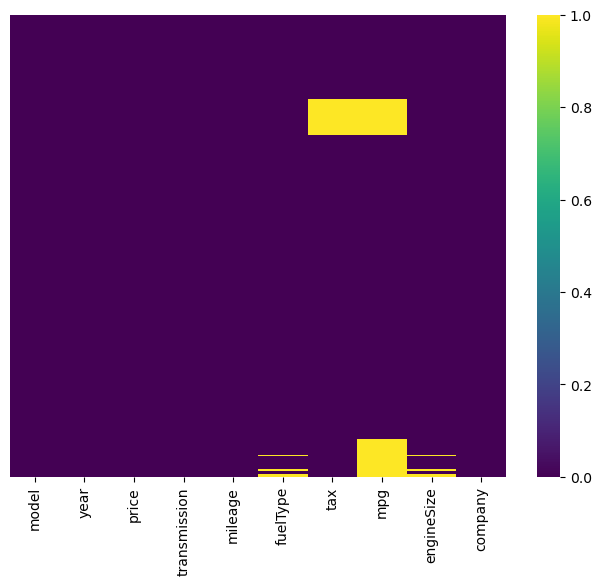

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
ax=sns.heatmap(all_files.isnull(),yticklabels=False, cmap='viridis')
plt.savefig('null_values')
plt.show()

In [58]:
#find the sum null values in each column 
all_files.isnull().sum()

model             155
year              247
price             155
transmission      155
mileage           212
fuelType         1073
tax              9618
mpg             18963
engineSize       1079
company             0
dtype: int64

In [59]:
all_files.isnull().mean()

model           0.001312
year            0.002091
price           0.001312
transmission    0.001312
mileage         0.001794
fuelType        0.009082
tax             0.081411
mpg             0.160512
engineSize      0.009133
company         0.000000
dtype: float64

In [60]:
all_files['model'] = all_files['model'].fillna(all_files['model'].mode()[0])
all_files['year'] = all_files['year'].fillna(all_files['year'].mode()[0])
all_files['transmission'] = all_files['transmission'].fillna(all_files['transmission'].mode()[0])
all_files['fuelType']= all_files['fuelType'].fillna(all_files['fuelType'].mode()[0])
all_files['tax'] = all_files['tax'].fillna(all_files['tax'].mean())
all_files['mpg'] = all_files['mpg'].fillna(all_files['mpg'].mean())
all_files['engineSize'] = all_files['engineSize'].fillna(all_files['engineSize'].mean())
all_files['mileage'] = all_files['mileage'].fillna(all_files['mileage'].mean())
all_files['price'] = all_files['price'].fillna(all_files['price'].mean())

In [61]:
all_files.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
company         0
dtype: int64

In [62]:
all_files.shape

(118141, 10)

In [63]:
all_files.describe()

,price,mileage,tax,mpg,engineSize
count,118141.000000,118141.000000,118141.000000,118141.000000,118141.000000
mean,16960.121633,22966.615058,119.959933,55.167494,1.661389
std,9653.705984,21128.448298,76.439242,14.786986,0.553033
min,450.000000,1.000000,0.000000,0.300000,0.000000
25%,10395.000000,7529.000000,119.959933,47.900000,1.200000
50%,14980.000000,17120.000000,145.000000,55.167494,1.600000
75%,20950.000000,32082.000000,145.000000,60.100000,2.000000
max,159999.000000,323000.000000,5400.000000,470.800000,6.600000


# 

In [64]:
all_files.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,Audi
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,Audi
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,Audi
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,Audi
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,Audi


In [65]:
all_files['model'].nunique()

195

# Exploratary Data Analysis

In [66]:
len(all_files['price'])

118141

In [67]:
len(all_files['mileage'])

118141

In [68]:
outliers_detection = detect_outliers(all_files,0,['price','mileage'])
len(outliers_detection)

9280

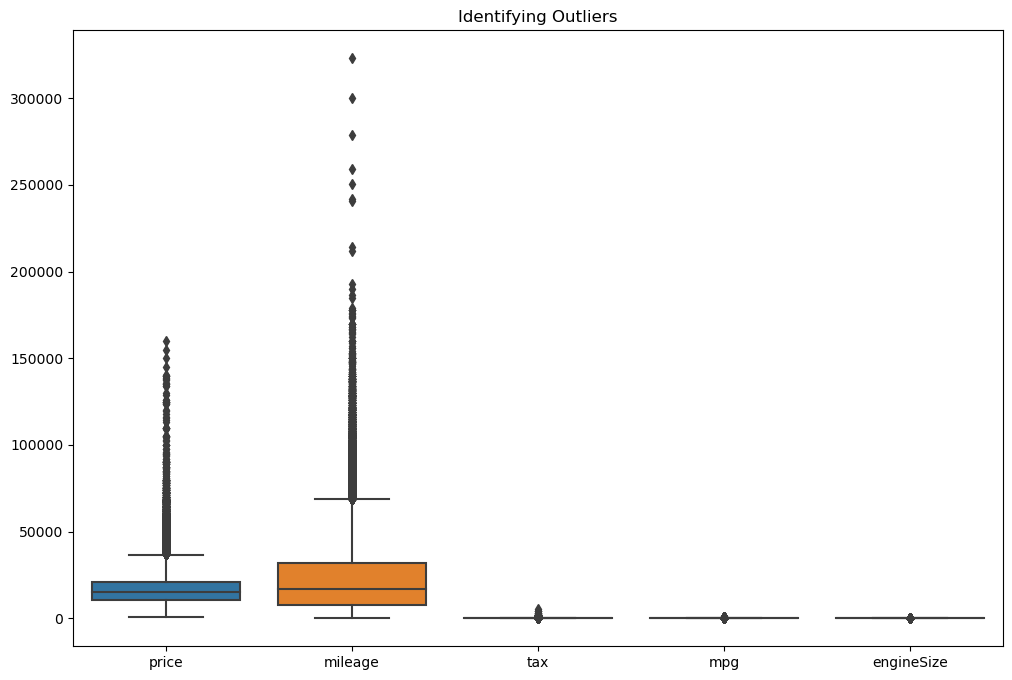

In [69]:
#detecting outliers
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=all_files)
plt.title('Identifying Outliers')
plt.savefig('outliers.png')

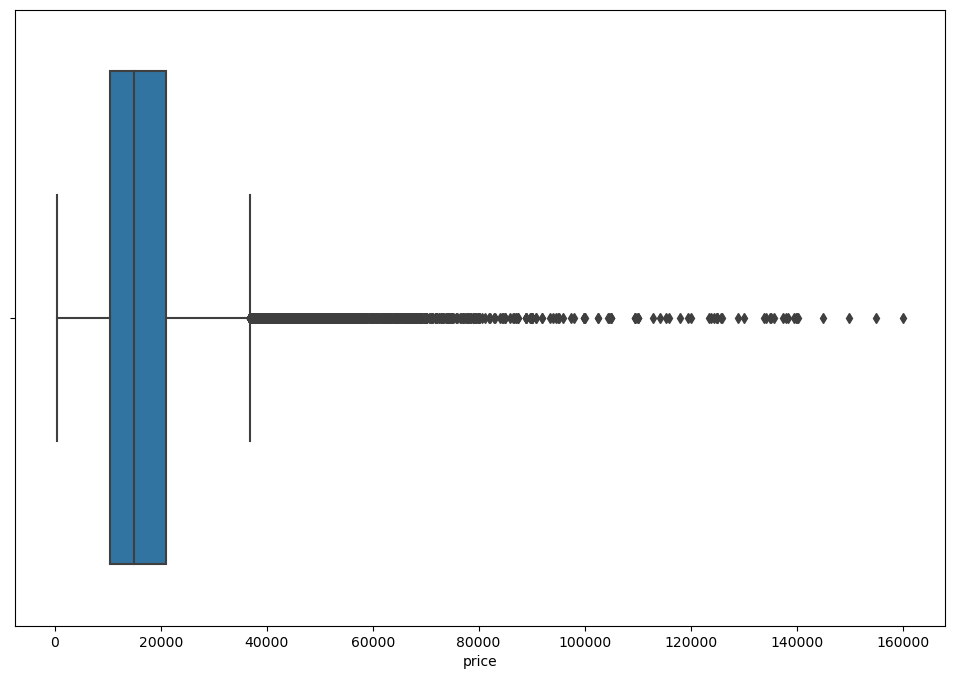

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x='price',data=all_files)
plt.savefig('Outliers_price.png')

<AxesSubplot:xlabel='mileage'>

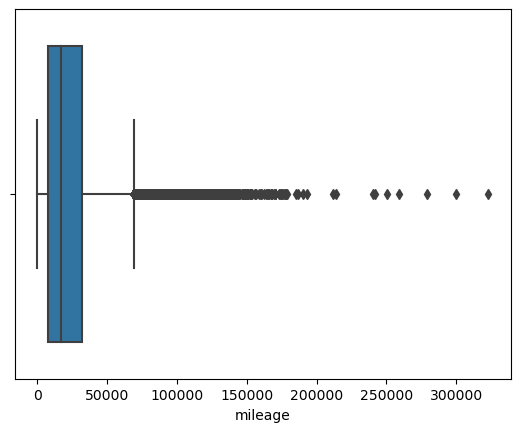

In [71]:
sns.boxplot(x='mileage',data=all_files)

Only two columns contains outliers. Almost 7% of the values from price and mileage columns are detected as outliers. Therefore, as 7% is the significant amount therefore, outliers cannot be dropped. We will use capping through interquantile range to deal with outliers.  

In [72]:
#create a method for finding upper and lower boudaries for the columns
def find_skewed_boundaries(df, variable, distance):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
    
    return lower_boundary , upper_boundary

In [73]:
#upper and lower limits for price
price_lower_limit, price_upper_limit = find_skewed_boundaries(all_files, 'price', 1.5)
price_lower_limit, price_upper_limit

(-5437.5, 36782.5)

In [74]:
#upper and lower limits for mileage
mileage_lower_limit, mileage_upper_limit = find_skewed_boundaries(all_files, 'mileage', 1.5)
mileage_lower_limit, mileage_upper_limit

(-29300.5, 68911.5)

In [75]:
# Now let's replace the outliers by the maximum and minimum limit
all_files['price'] = np.where(all_files['price']>price_upper_limit, price_upper_limit,
                             np.where(all_files['price']<price_lower_limit, price_lower_limit, all_files['price']))

In [76]:
# Now let's replace the outliers by the maximum and minimum limit
all_files['mileage'] = np.where(all_files['mileage']>mileage_upper_limit, mileage_upper_limit,
                             np.where(all_files['mileage']<mileage_lower_limit, mileage_lower_limit, all_files['mileage']))

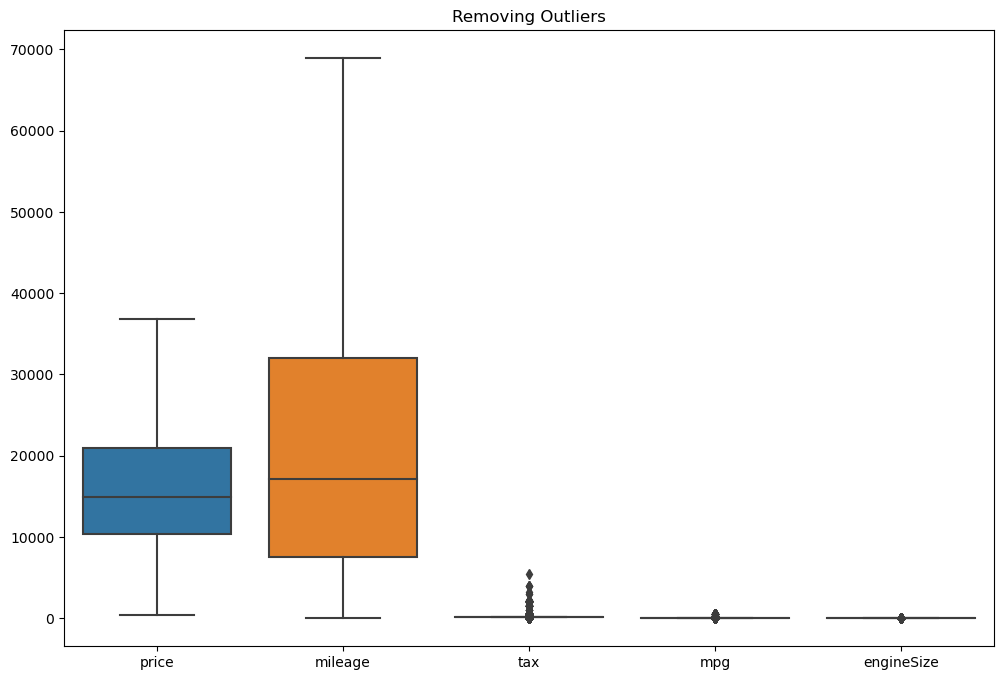

In [77]:
#So, outliers have been removed as seen in the following boxplot
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data = all_files)
plt.title('Removing Outliers')
plt.savefig('outlier_handling.png')

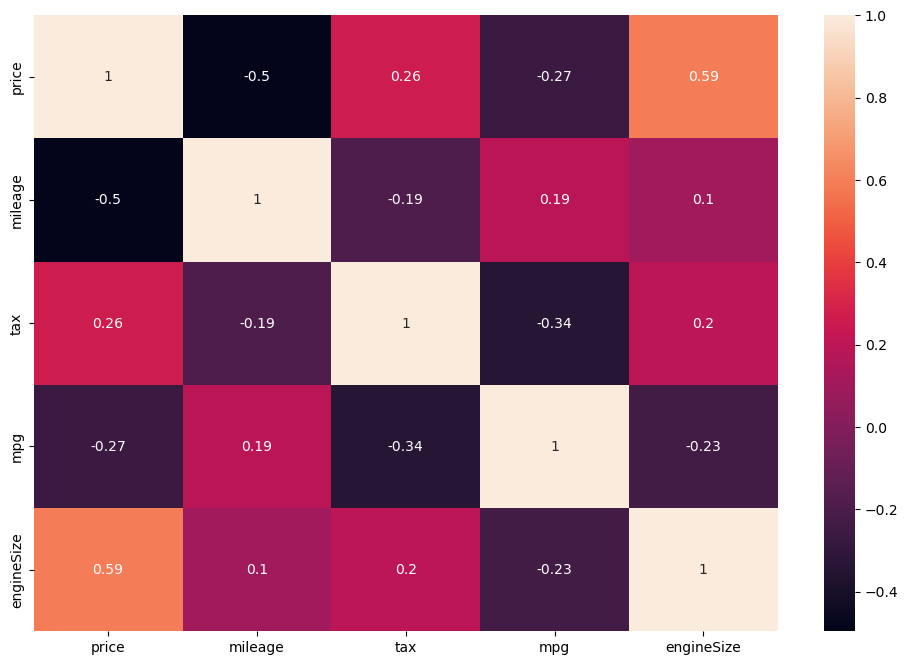

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.heatmap(all_files.corr(), annot=True)
plt.savefig('features_correlation.png')
plt.show()

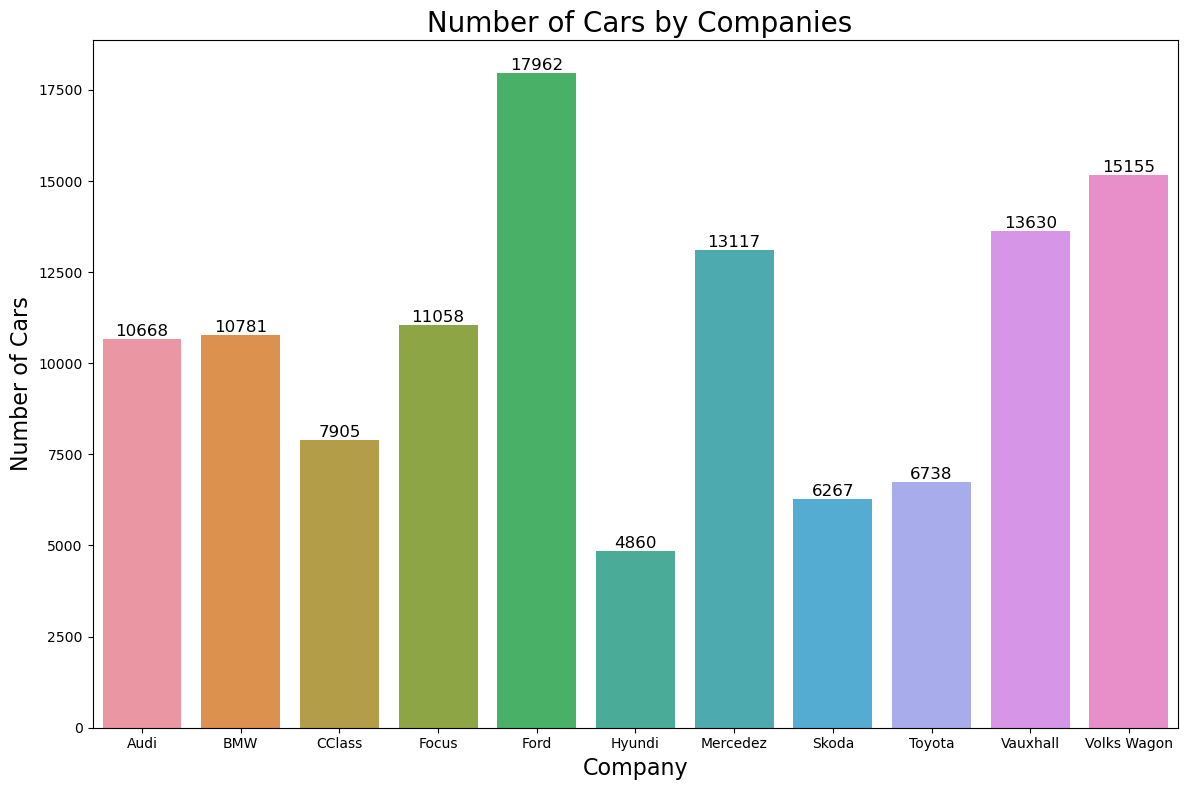

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='company', data=all_files)
ax.set_xlabel('Company', size=16)
ax.set_ylabel('Number of Cars', size=16)
ax.set_title(' Number of Cars by Companies', size=20)
plt.bar_label(ax.containers[-1], size=12)
plt.tight_layout()
plt.savefig('number_of_cars_by_companies.png')
plt.show()

In [80]:
temp_df = all_files.groupby(['company','year'])['model'].count().reset_index()
temp_df

,company,year,model
0,Audi,1997.0,1
1,Audi,1998.0,1
2,Audi,2002.0,2
3,Audi,2003.0,6
4,Audi,2004.0,5
...,...,...,...
228,Volks Wagon,2016.0,2647
229,Volks Wagon,2017.0,2946
230,Volks Wagon,2018.0,1509
231,Volks Wagon,2019.0,4669


In [81]:
pivoted_df = temp_df.pivot(index='year', columns='company', values='model')
pivoted_df.fillna(0)

company,Audi,BMW,CClass,Focus,Ford,Hyundi,Mercedez,Skoda,Toyota,Vauxhall,Volks Wagon
year,,,,,,,,,,,
1991.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1997.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1998.0,1.0,1.0,2.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0
1999.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2000.0,0.0,2.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0
2001.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,2.0,4.0
2002.0,2.0,6.0,8.0,2.0,3.0,1.0,9.0,0.0,4.0,5.0,1.0


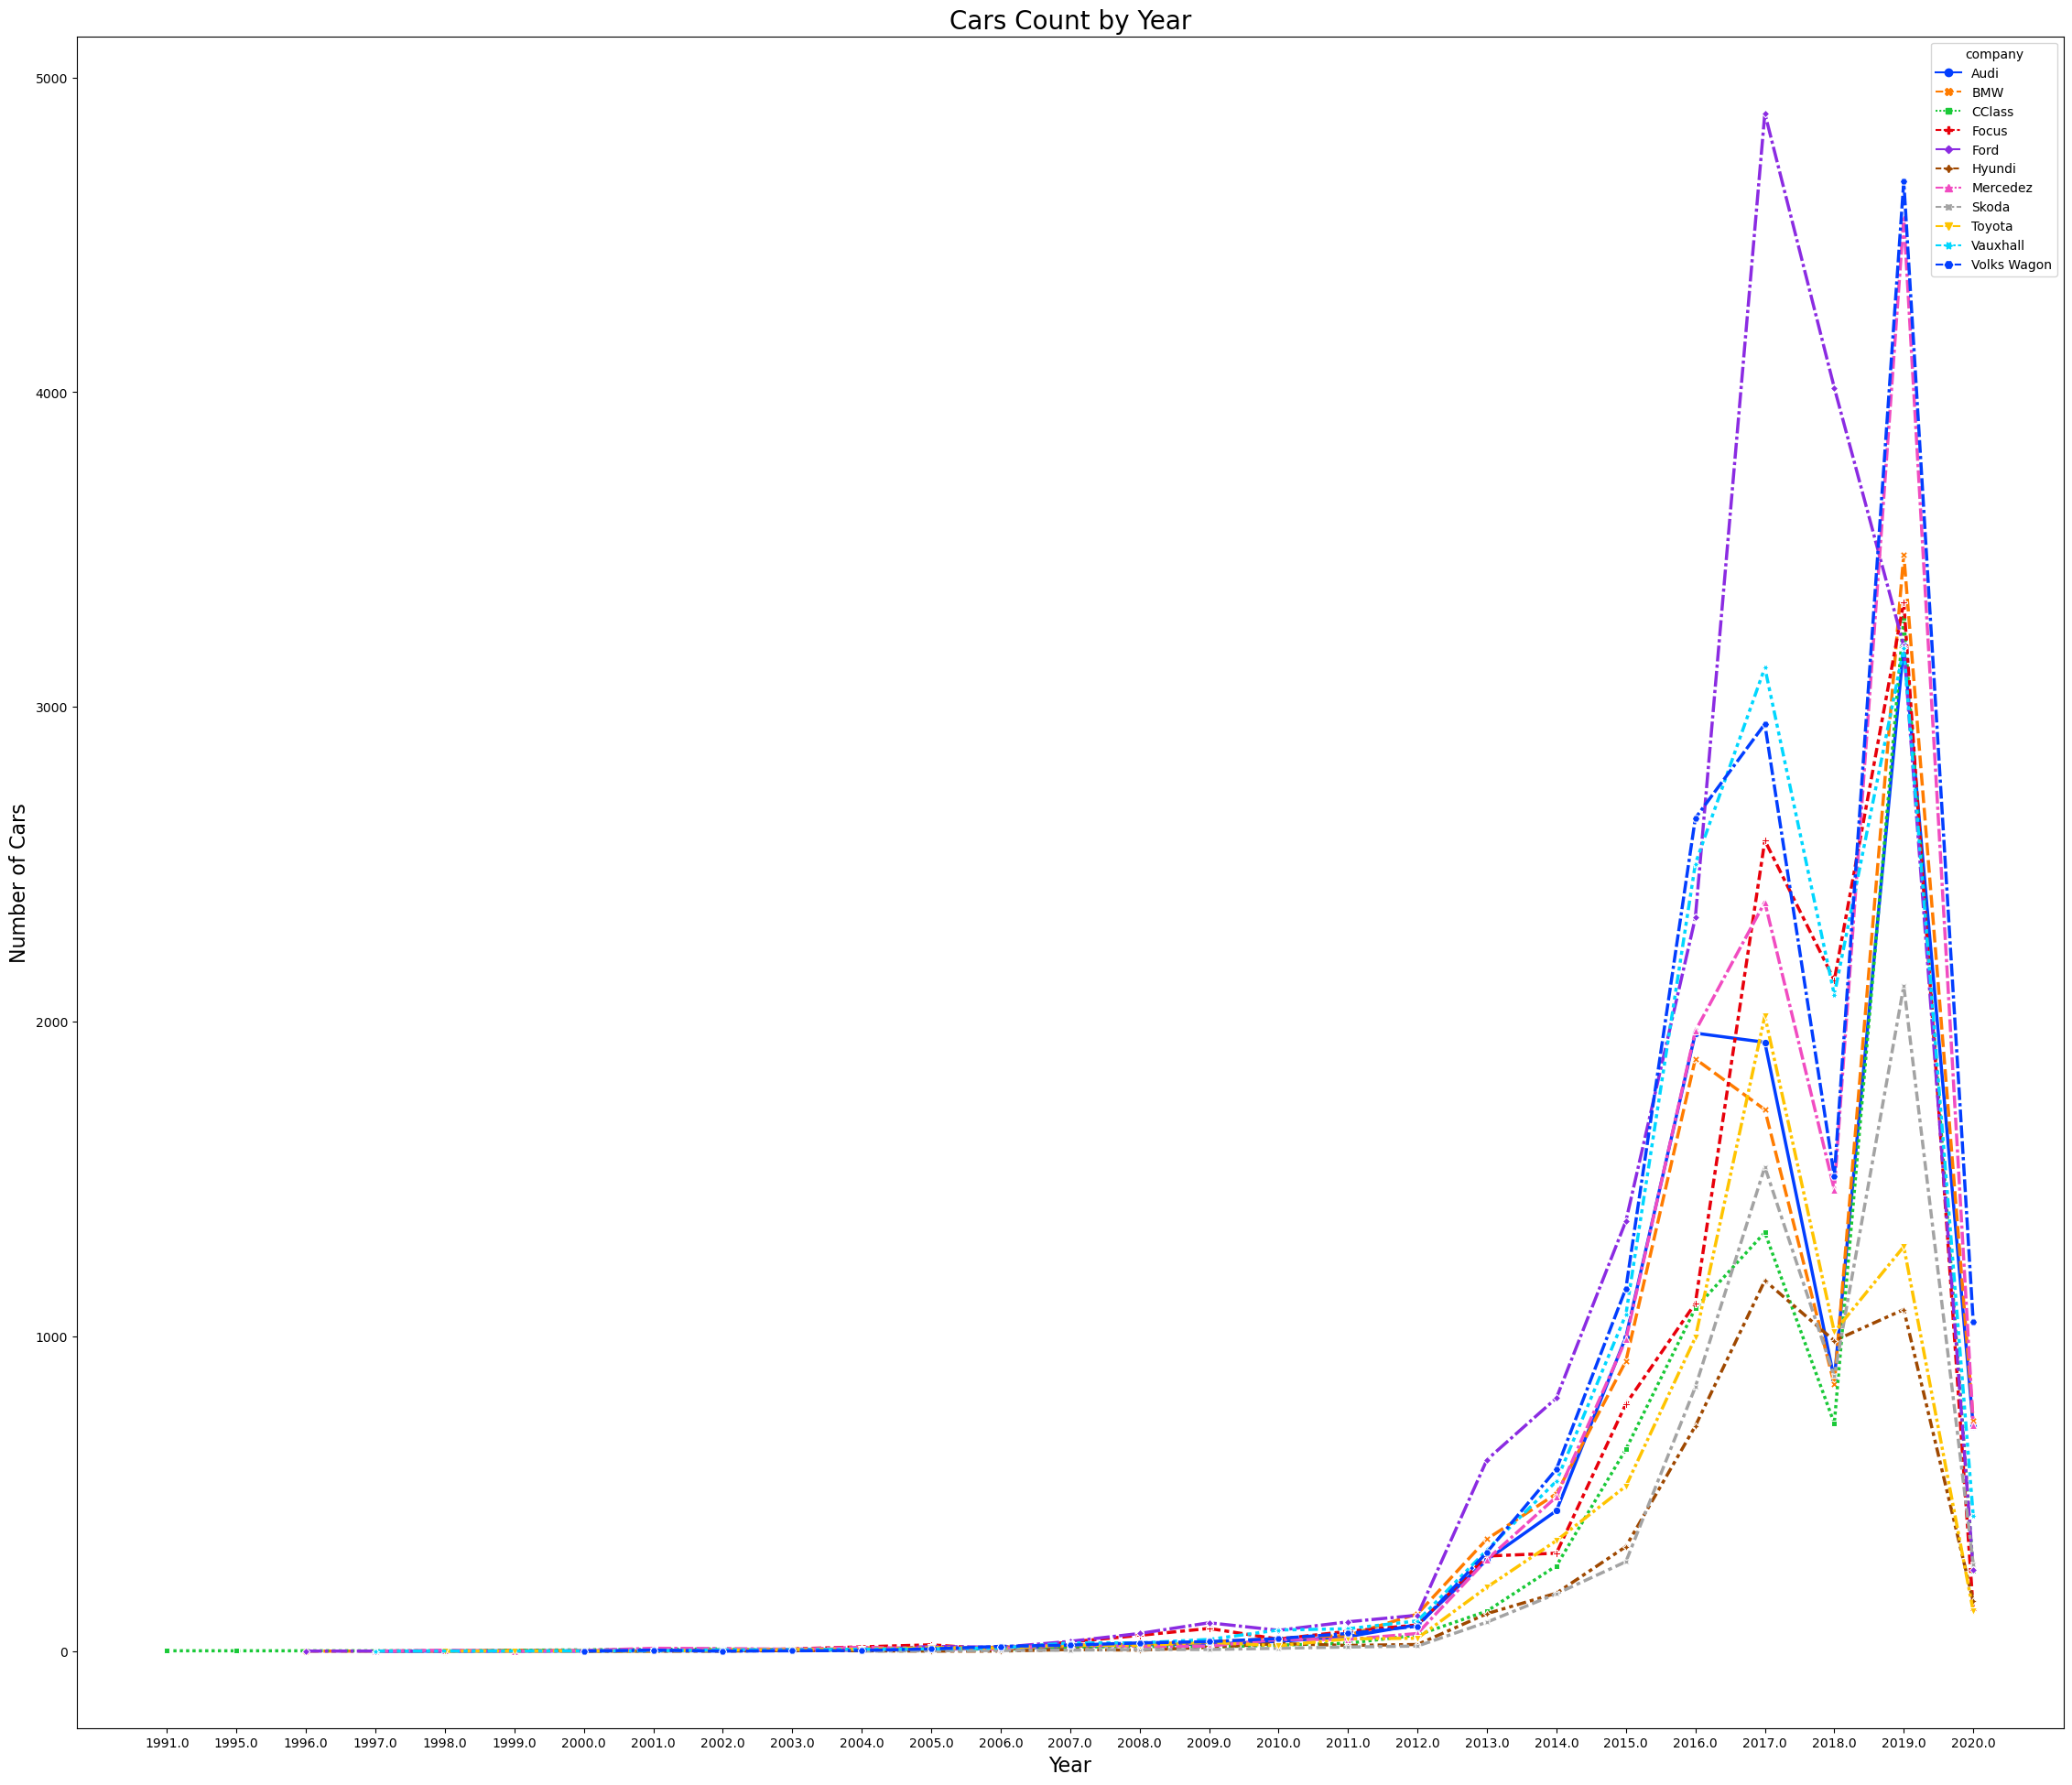

In [106]:
fig,ax= plt.subplots(figsize=(28,24))
ax = sns.lineplot(data=pivoted_df, markers=True, palette= 'bright', linewidth=2.5, linestyle='solid')
plt.tight_layout
plt.savefig('number_of_cars_by_companies_per_year.png')
plt.xlabel('Year',size=16)
plt.ylabel('Number of Cars',size=16)
plt.title('Cars Count by Year', size=20)
plt.savefig('number_of_cars_by_companies_per_year.png')
plt.show()

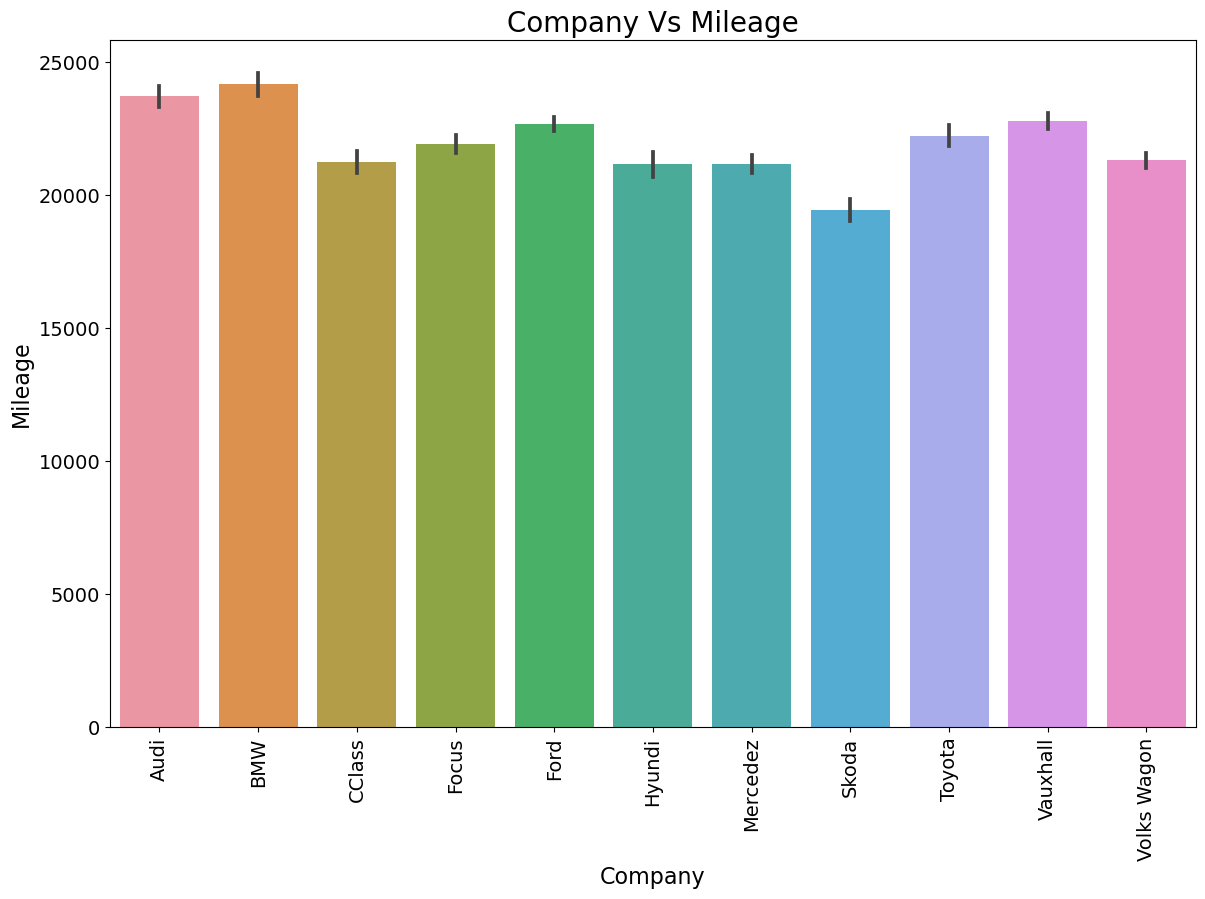

In [83]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='company',y='mileage', data=all_files)
ax.set_xlabel('Company', size=16)
ax.set_ylabel('Mileage', size=16)
ax.set_title('Company Vs Mileage', size=20)
plt.tight_layout()
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.savefig('companies_with_average_milleage.png')
plt.show()

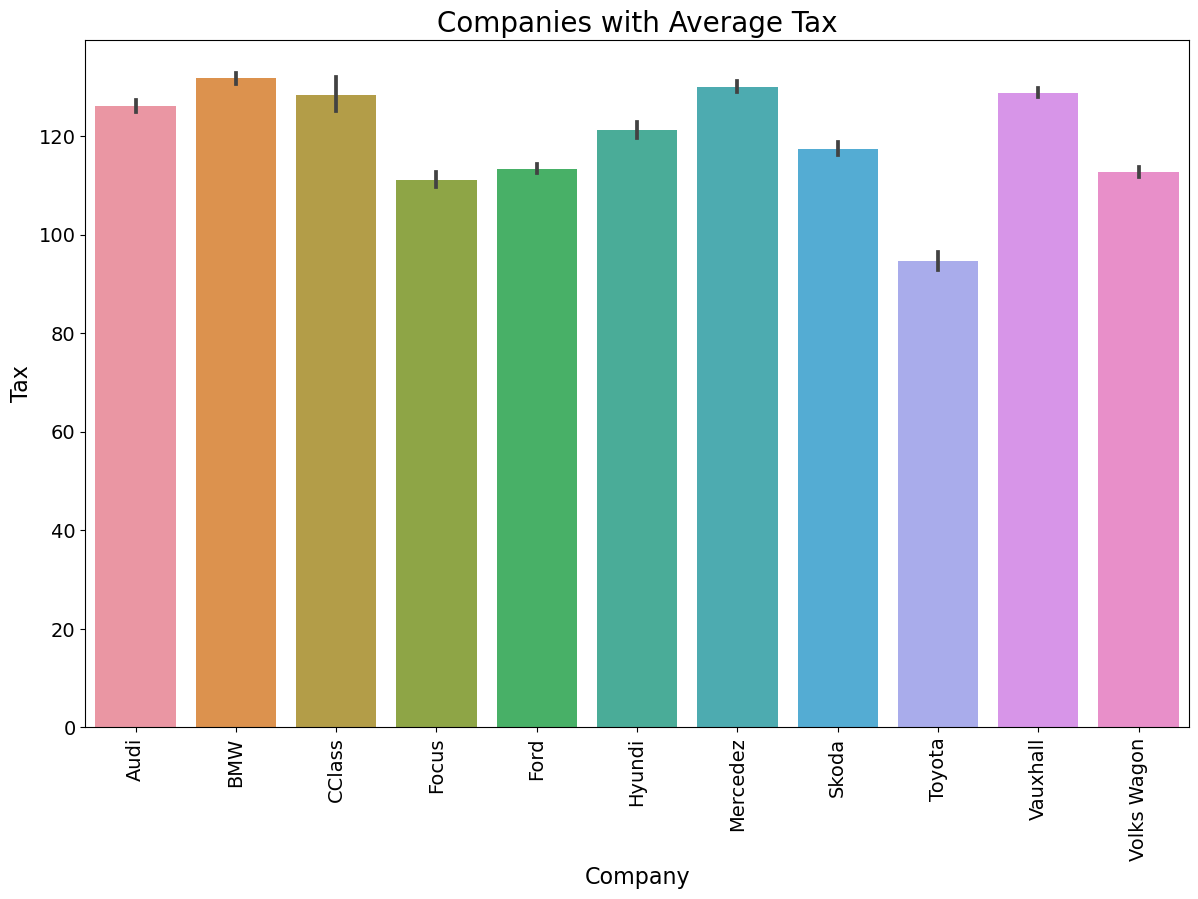

In [84]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='company',y='tax', data=all_files)
ax.set_xlabel('Company', size=16)
ax.set_ylabel('Tax', size=16)
ax.set_title('Companies with Average Tax', size=20)
plt.tight_layout()
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.savefig('companies_with_average_tax.png')
plt.show()

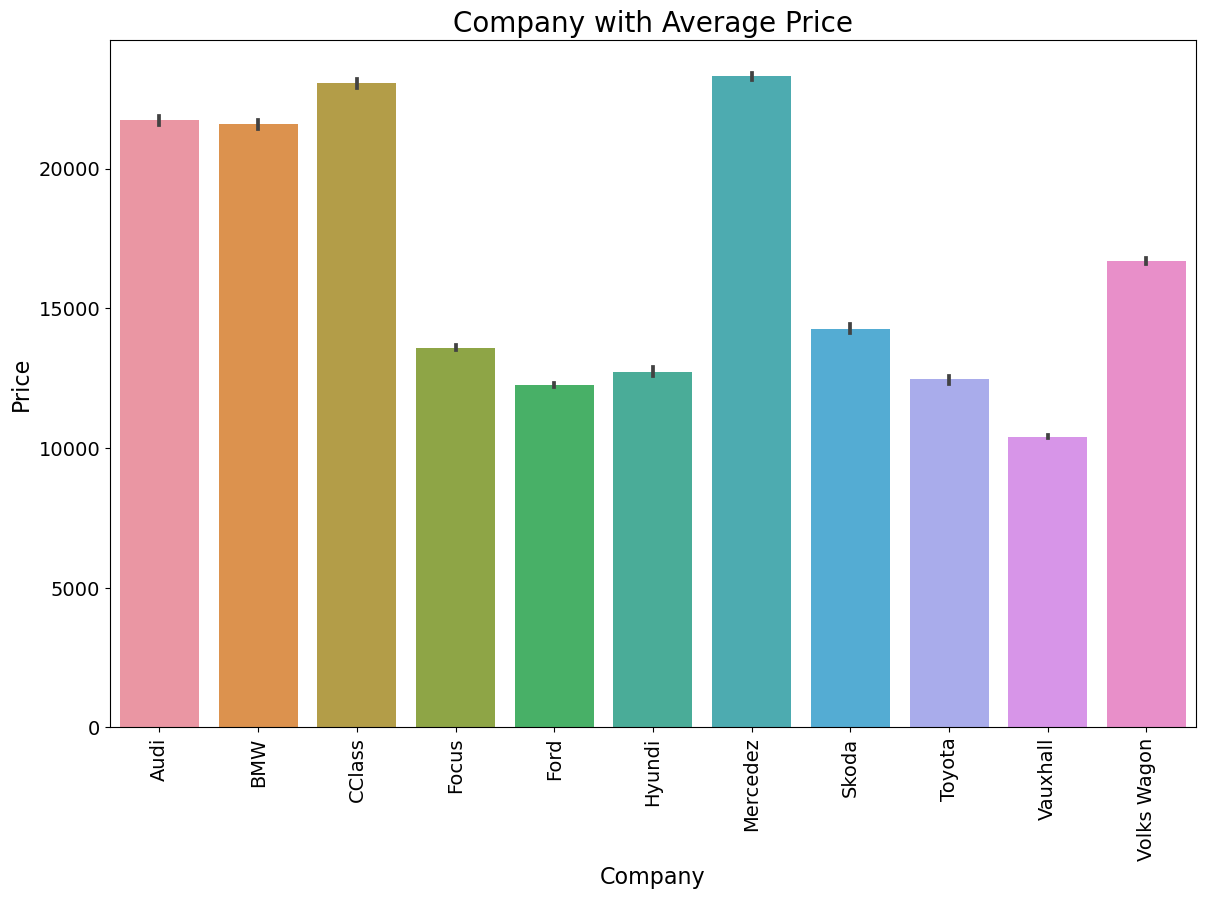

In [85]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='company',y='price', data=all_files)
ax.set_xlabel('Company', size=16)
ax.set_ylabel('Price', size=16)
ax.set_title('Company with Average Price', size=20)
plt.tight_layout()
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.savefig('companies_with_average_price.png')
plt.show()

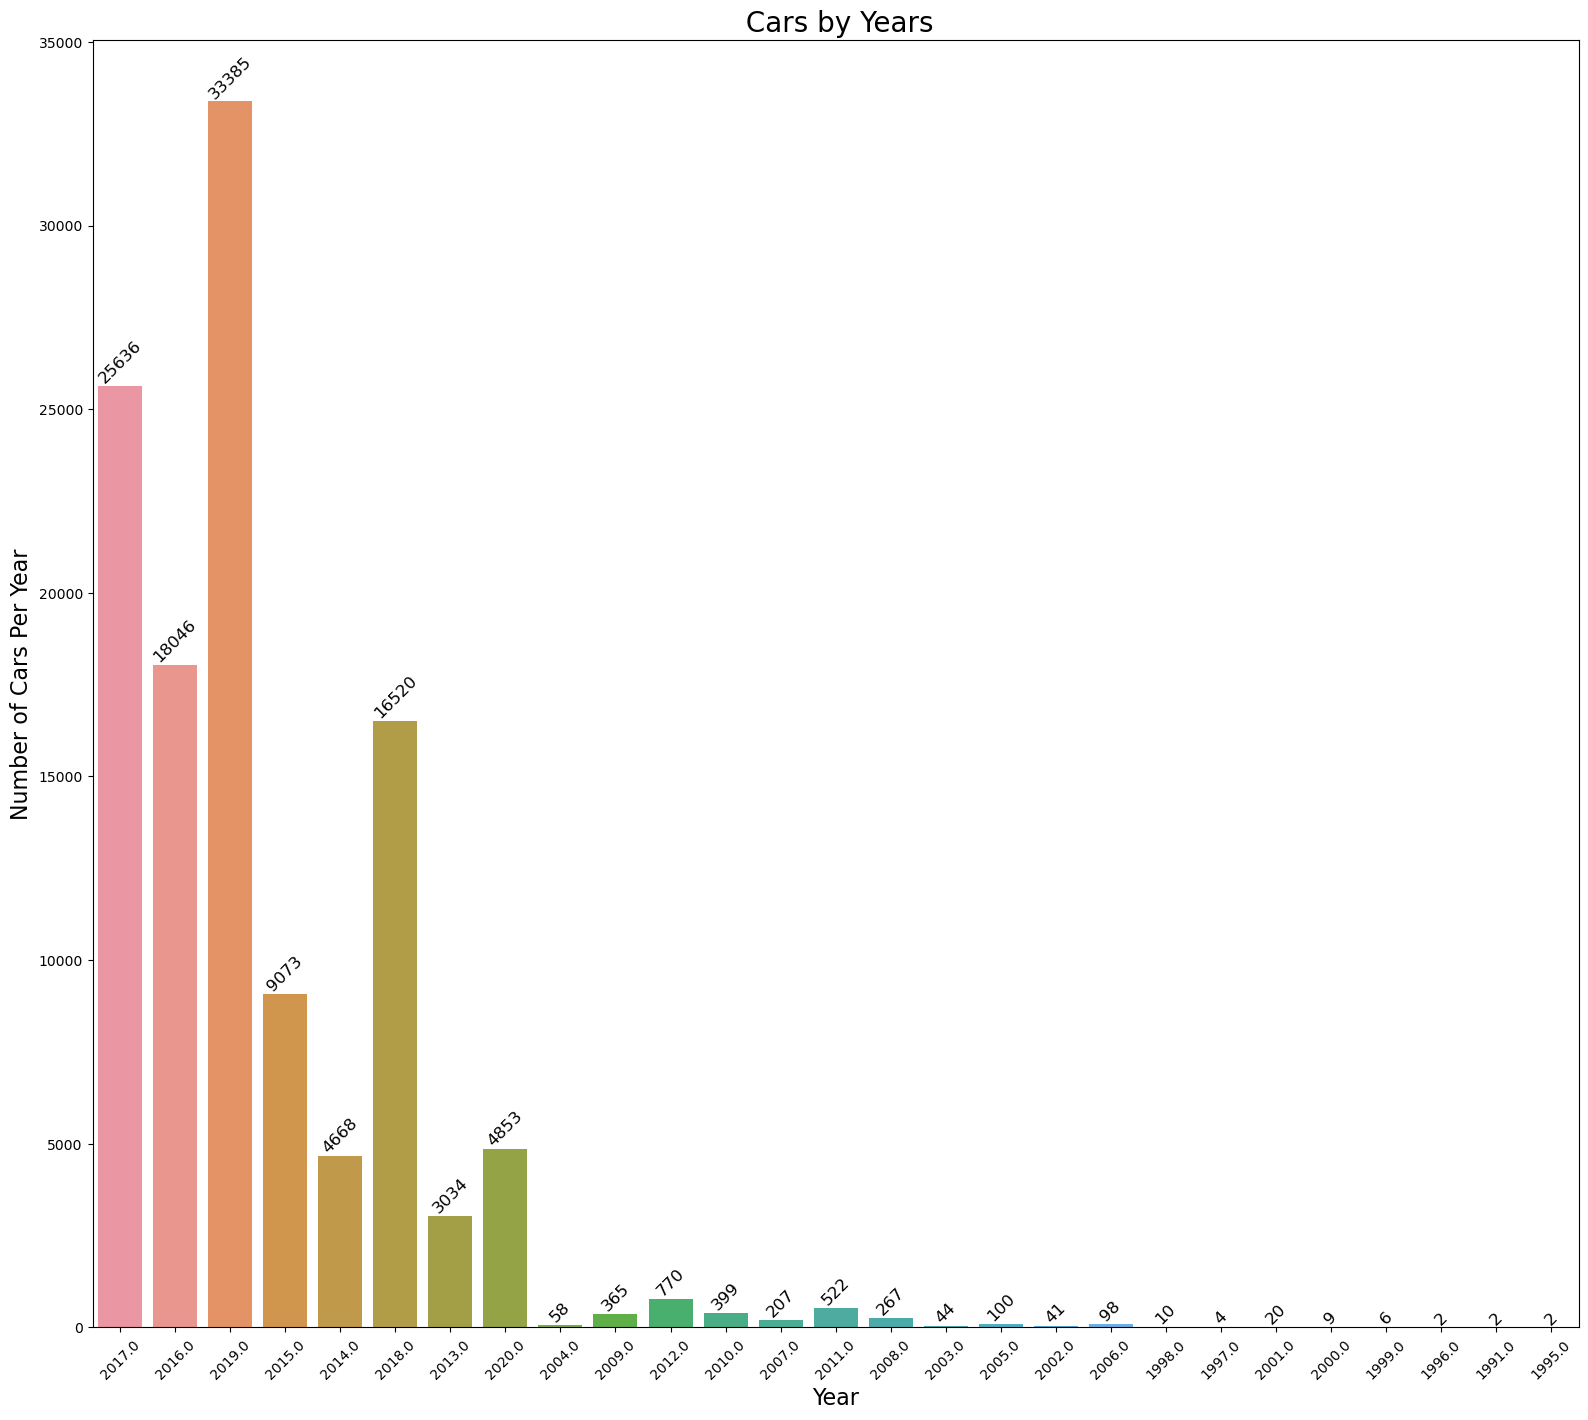

In [86]:
fig, ax = plt.subplots(figsize=(16,14))
ax = sns.countplot(x='year', data=all_files)
ax.set_xlabel('Year', size=16)
ax.set_ylabel('Number of Cars Per Year', size=16)
ax.set_title(' Cars by Years', size=20)
plt.bar_label(ax.containers[-1], size=12, rotation=45)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('number_of_cars_by_years.png')
plt.show()

In [88]:
# fig, ax = plt.subplots(figsize=(12,10))
# ax= plt.pie(all_files['year'])
# plt.show()

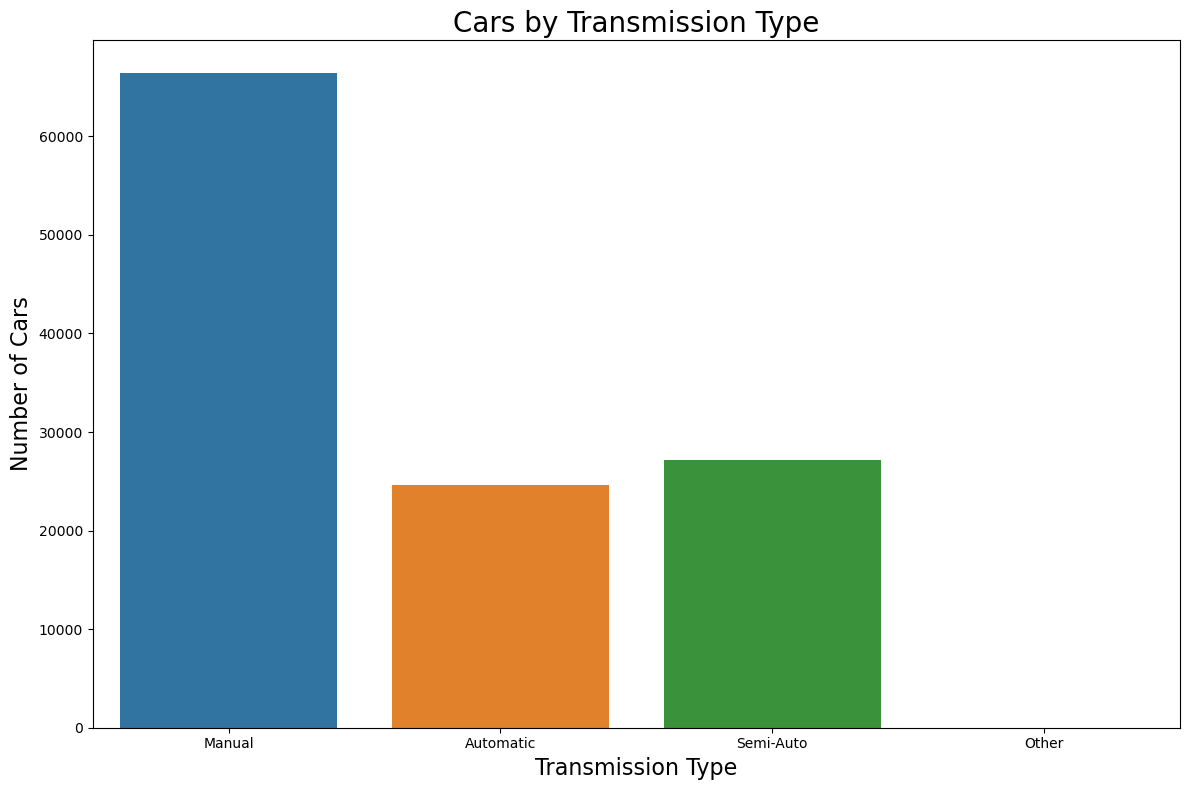

In [89]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='transmission', data=all_files)
ax.set_xlabel('Transmission Type', size=16)
ax.set_ylabel('Number of Cars', size=16)
ax.set_title('Cars by Transmission Type', size=20)
plt.tight_layout()
plt.savefig('cars_by_transmission_type.png')
plt.show()

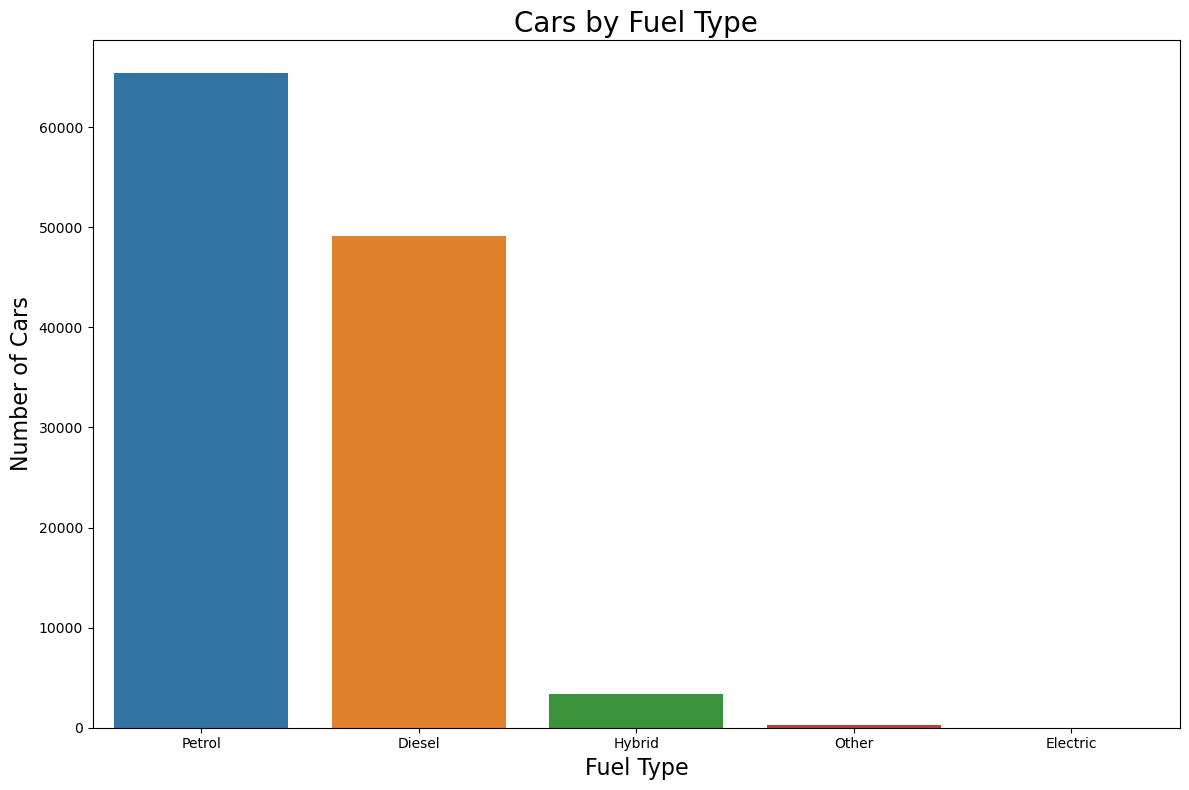

In [90]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='fuelType', data=all_files)
ax.set_xlabel('Fuel Type', size=16)
ax.set_ylabel('Number of Cars', size=16)
ax.set_title('Cars by Fuel Type', size=20)
plt.tight_layout()
plt.savefig('cars_by_fuel_type.png')
plt.show()

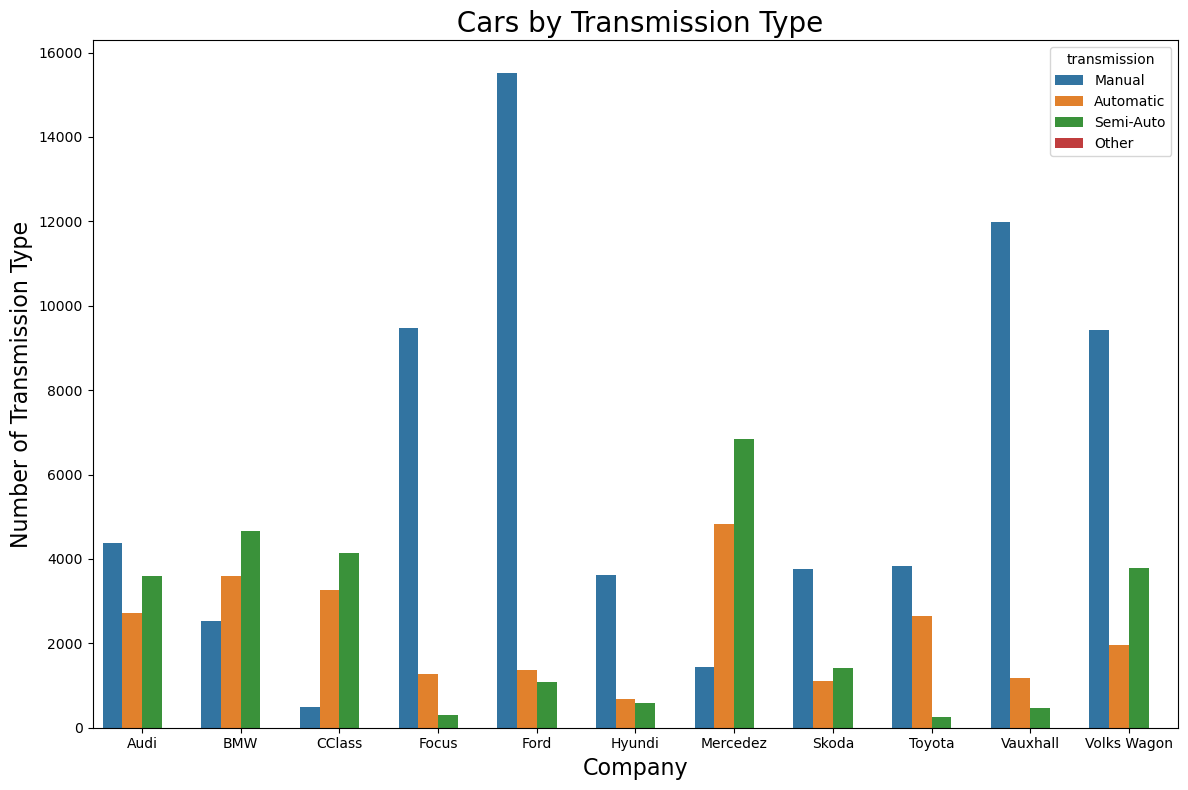

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='company', data=all_files, hue='transmission')
ax.set_xlabel('Company', size=16)
ax.set_ylabel('Number of Transmission Type', size=16)
ax.set_title(' Cars by Transmission Type', size=20)
plt.tight_layout()
plt.savefig('companies_and_transmission_type_rate.png')
plt.show()

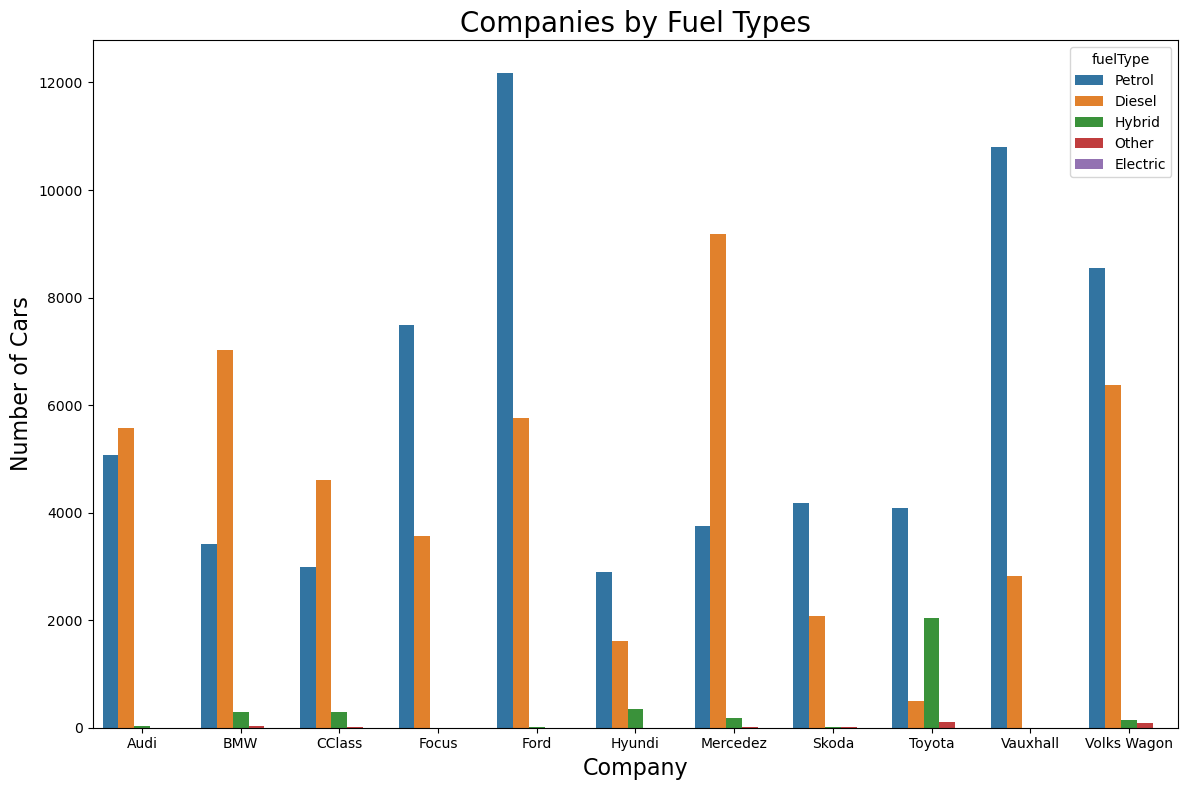

In [92]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='company', data=all_files, hue='fuelType')
ax.set_xlabel('Company', size=16)
ax.set_ylabel('Number of Cars', size=16)
ax.set_title('Companies by Fuel Types', size=20)
#plt.bar_label(ax.containers[-1], size=12)
plt.tight_layout()
plt.savefig('Companies_and_fuel_type_rate.png')
plt.show()

# Data Preprocessing

In [93]:
# As 'other' is present in both trasmission column and FuelType column, therefore to keep the features unique for modelling,assign some values(0-3) to transmission's features
transmission_mapping = {'Automatic': 0,'Semi-Auto': 1,'Manual': 2, 'Other':3}
all_files['transmission'] = all_files['transmission'].map(transmission_mapping)

In [94]:
all_files.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017.0,12500.0,2,15735.0,Petrol,150.0,55.4,1.4,Audi
1,A6,2016.0,16500.0,0,36203.0,Diesel,20.0,64.2,2.0,Audi
2,A1,2016.0,11000.0,2,29946.0,Petrol,30.0,55.4,1.4,Audi
3,A4,2017.0,16800.0,0,25952.0,Diesel,145.0,67.3,2.0,Audi
4,A3,2019.0,17300.0,2,1998.0,Petrol,145.0,49.6,1.0,Audi


In [95]:
Model = pd.get_dummies(all_files['model'], drop_first=True)
FuelType = pd.get_dummies(all_files['fuelType'], drop_first=True)
Year = pd.get_dummies(all_files['year'], drop_first=True)
Company = pd.get_dummies(all_files['company'], drop_first=True)
all_files = pd.concat([all_files,Model,FuelType,Company,Year], axis=1)
all_files.drop(['model','fuelType','company','year'], axis=1, inplace=True)

In [96]:
all_files.head()

,price,transmission,mileage,tax,mpg,engineSize,2 Series,3 Series,4 Series,5 Series,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,12500.0,2,15735.0,150.0,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16500.0,0,36203.0,20.0,64.2,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11000.0,2,29946.0,30.0,55.4,1.4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,16800.0,0,25952.0,145.0,67.3,2.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,17300.0,2,1998.0,145.0,49.6,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
all_files.head()

,price,transmission,mileage,tax,mpg,engineSize,2 Series,3 Series,4 Series,5 Series,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,12500.0,2,15735.0,150.0,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16500.0,0,36203.0,20.0,64.2,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11000.0,2,29946.0,30.0,55.4,1.4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,16800.0,0,25952.0,145.0,67.3,2.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,17300.0,2,1998.0,145.0,49.6,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
all_files.columns

Index(['price', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize',
       ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ...
       '2011.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0', '2017.0',
       '2018.0', '2019.0', '2020.0'],
      dtype='object', length=240)

In [99]:
all_files.shape

(118141, 240)

In [100]:
#normalizing the columns
ss = StandardScaler()
cols = ['price','mileage','tax','mpg','engineSize']
all_files[cols] = ss.fit_transform(all_files[cols])

In [101]:
all_files.dropna(axis=1, inplace=True)

In [102]:
X=all_files.drop(columns=['price'], axis=1)
y= all_files['price']

In [103]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.33)

# Modeling

In [104]:
models = {'Decision Tree': DecisionTreeRegressor(),
         'Random Forest' : RandomForestRegressor(),
         'XGB' : XGBRegressor(),
         'K-Neighbor Regressor' : KNeighborsRegressor()}

In [105]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions= model.predict(X_test)
    print(model_name)
    print('Validation Score: ', r2_score(predictions,y_test))
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))
    print('Mean Square Error: ', metrics.mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('*' * 10)
               

Decision Tree
Validation Score:  0.9372359050088374
Mean Absolute Error:  0.15040774546076105
Mean Square Error:  0.06256047969413973
Root Mean Squared Error:  0.2501209301400819
**********
Random Forest
Validation Score:  0.9582642301319361
Mean Absolute Error:  0.12929238845673513
Mean Square Error:  0.040022027730349956
Root Mean Squared Error:  0.2000550617463851
**********
XGB
Validation Score:  0.9460027827702654
Mean Absolute Error:  0.15837385573746557
Mean Square Error:  0.05032660473597068
Root Mean Squared Error:  0.22433591940652456
**********
K-Neighbor Regressor
Validation Score:  0.950953823614833
Mean Absolute Error:  0.14047299887349593
Mean Square Error:  0.046939005378405105
Root Mean Squared Error:  0.21665411461222034
**********
